# Import 

# PEP 8

In [17]:
#%load_ext pycodestyle_magic
#%pycodestyle_on

## Librairies

In [18]:
%pylab inline
import pandas as pd
import os
import seaborn as sns
from sklearn import preprocessing, pipeline, compose, decomposition
import plotly.express as px
from sklearn import manifold
from mypca import *
from sklearn import metrics
from kmodes.kprototypes import KPrototypes
sns.set_context("talk")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Données

In [19]:
customer = pd.read_csv('customer.csv', index_col='customer_unique_id')

In [20]:
customer['same_state'] = customer['same_state'].astype('category')

## Preparation

In [21]:
num = list(customer.select_dtypes(['float', 'int']).columns)
cat = list(customer.select_dtypes(['object', 'category']).columns)

num.remove('lat')
num.remove('long')

In [22]:
# One hot encoding
one_hot_sparse = preprocessing.OneHotEncoder(sparse=True)
one_hot = preprocessing.OneHotEncoder(sparse=False)

# Standard Scaler
scaler = preprocessing.StandardScaler()

# log x +1
log = preprocessing.FunctionTransformer(func=np.log1p)

# Valeur absolue
abso = preprocessing.FunctionTransformer(func=np.abs)

# Pipelines
std_log = pipeline.make_pipeline(log, scaler)
abso_std_log = pipeline.make_pipeline(abso, log, scaler)

In [23]:
# preprocesseur v1

preprocessor_kprot = compose.make_column_transformer(
    (abso_std_log, num),
    remainder='passthrough'
)

## Dimensionality reduction : PCA

In [24]:
X = customer
n_comp = 6  # Nombre de dimensions
features = customer.columns  # Extraction des noms de variables
names = customer.index  # Extraction des noms de pays

## Clustering

### K-prototype

In [28]:
customer.dtypes


basket_avg               float64
last_purchase              int64
avg_review_score         float64
total_amount             float64
avg_vol_pack             float64
payment_type              object
avg_delivery_time        float64
same_state              category
avg_freight_value        float64
avg_weight               float64
payment_installments     float64
lat                      float64
long                     float64
frequency                  int64
cat                       object
dtype: object

In [45]:
X

,basket_avg,last_purchase,avg_review_score,total_amount,avg_vol_pack,payment_type,avg_delivery_time,same_state,avg_freight_value,avg_weight,payment_installments,lat,long,frequency,cat
customer_unique_id,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,115,5.0,129.90,7616.0,credit_card,6.0,True,12.00,1500.0,8.0,-23.340235,-46.830140,1,home
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,118,4.0,18.90,5148.0,credit_card,3.0,True,8.29,375.0,1.0,-23.559115,-46.787626,1,beauty_health
0000f46a3911fa3c0805444483337064,69.00,541,3.0,69.00,43750.0,credit_card,25.0,False,17.22,1500.0,8.0,-27.542880,-48.633426,1,office
0000f6ccb0745a6a4b88665a16c9f078,25.99,325,4.0,25.99,1045.0,credit_card,20.0,False,17.63,150.0,4.0,-1.312214,-48.483159,1,technology
0004aac84e0df4da2b147fca70cf8255,180.00,292,5.0,180.00,528.0,credit_card,13.0,True,16.89,6050.0,6.0,-23.505548,-47.469705,1,technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,451,5.0,1570.00,251625.0,credit_card,27.0,False,248.71,30000.0,10.0,-8.362511,-36.562343,1,beauty_health
fffea47cd6d3cc0a88bd621562a9d061,64.89,266,4.0,64.89,32076.0,credit_card,30.0,False,19.69,1720.0,1.0,-12.217395,-38.959308,1,children
ffff371b4d645b6ecea244b27531430a,89.90,572,5.0,89.90,3315.0,credit_card,14.0,False,22.56,600.0,1.0,-11.834552,-55.508110,1,auto


In [52]:
cust_kp.shape

(93274, 15)

In [58]:
cust_kp = preprocessor_kprot.fit_transform(X)
cols = list(X.columns)

df_kp = pd.DataFrame(cust_kp, columns = cols)

Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing centroids
Starting iterations...
Starting iterations...
Starting iterations...
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing centroids
Starting iterations...
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Run: 1, iteration: 1/10, moves: 7910, ncost: 5449451714869.888
Run: 3, iteration: 1/10, moves: 13639, ncost: 8545419762584.737
Run: 2, iteration: 1/10, moves: 15702, ncost: 7167931517292.012
Init: initializing centroids
Init: initializing clusters
Run: 4, iteration: 1/10, moves: 15797, ncost: 8731048905983.75
Init: initializing centroids
Run: 1, iteration: 2/10, moves: 3107, ncost: 5021817875

ValueError: x and y must have same first dimension, but have shapes (8,) and (5,)

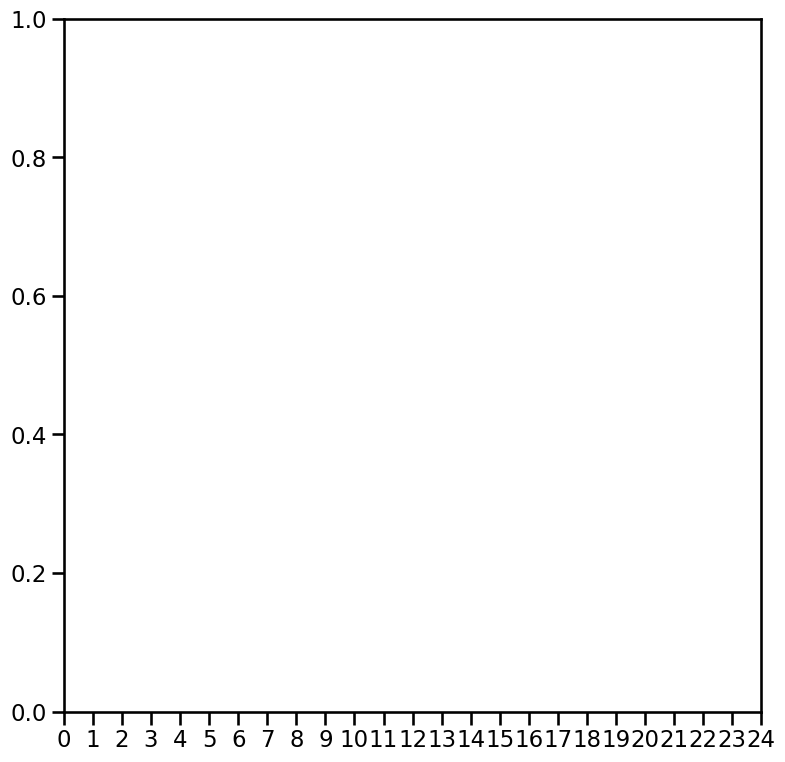

In [33]:
# méthode du coude avec le calcul de l'inertie

inertia = []
nb_cluster_max = 9
for z in range(5,nb_cluster_max+1):
    kp = KPrototypes(
        n_clusters=z, 
        init='Huang',
        n_jobs=-1,
        n_init=5,
        max_iter=20,
        verbose=2)
    kp.fit(X, categorical = [5,7,14])
    inertia.append(kp.cost_)
    print(inertia)


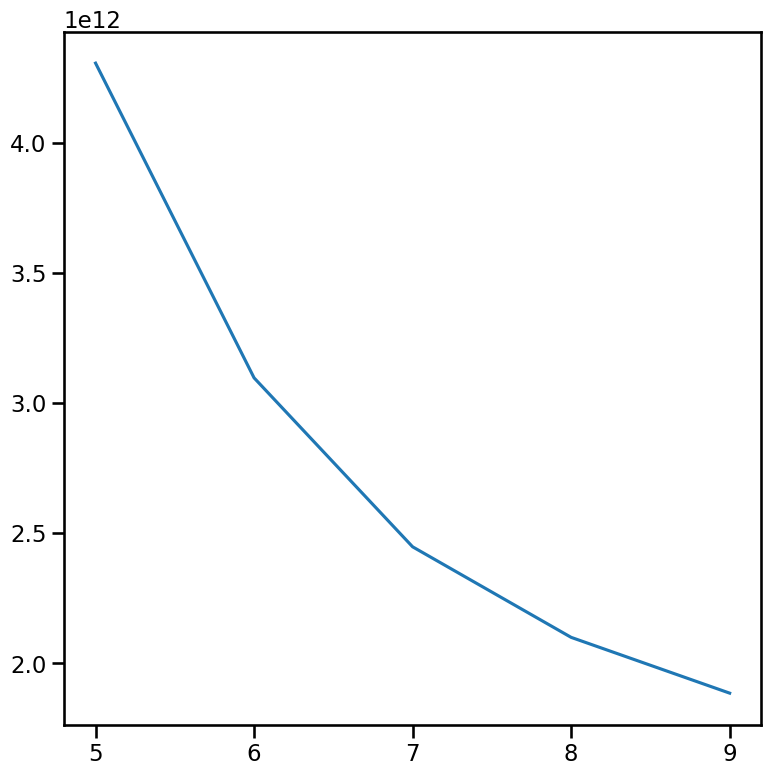

In [34]:
    
x = np.arange(5,nb_cluster_max+1)

fig, ax = plt.subplots(figsize=(9, 9))
ax.set_xticks(ticks=np.arange(0,25,1))
# ax.grid(b=True)
plt.plot(x, inertia)
plt.show()

In [35]:
# défintions d'un code couleur pour chaque groupe

cmap = {
    0:'Crimson',
    1:'Sienna',
    2:'DarkBlue',
    3:'Orange',
    4:'Black',
    5:'Silver',
    6:'Chartreuse',
    7:'Fuchsia',
    8:'gray',
    9:'gray',
    10:'gray',
    11:'gray',
}


cmap_object = {
    '0':'Crimson',
    '1':'Sienna',
    '2':'DarkBlue',
    '3':'Orange',
    '4':'Black',
    '5':'Silver',
    '6':'Chartreuse',
    '7':'Fuchsia'
}

cmap_list = [
    'Crimson',
    'Sienna',
    'DarkBlue',
    'Orange',
    'Black',
    'Silver',
    'Chartreuse',
    'Fuchsia'
]


In [60]:
df_kp

,basket_avg,last_purchase,avg_review_score,total_amount,avg_vol_pack,payment_type,avg_delivery_time,same_state,avg_freight_value,avg_weight,payment_installments,lat,long,frequency,cat
0,0.409748,-0.494681,0.593423,0.365509,0.059755,-0.666031,-0.688674,0.454808,1.776124,-0.210103,credit_card,True,-23.340235,-46.83014,home
1,-1.631378,-0.465903,0.050002,-1.636201,-0.248673,-1.550093,-1.358546,-0.590544,-0.859853,-0.210103,credit_card,True,-23.559115,-46.787626,beauty_health
2,-0.268497,1.242939,-0.615091,-0.299638,1.436674,1.406919,-0.015692,0.454808,1.776124,-0.210103,credit_card,False,-27.54288,-48.633426,office
3,-1.301165,0.669958,0.050002,-1.312365,-1.504055,1.069522,0.028672,-1.279474,0.745996,-0.210103,credit_card,False,-1.312214,-48.483159,technology
4,0.760891,0.549669,0.593423,0.709872,-2.041028,0.428981,-0.052131,1.507556,1.335682,-0.210103,credit_card,True,-23.505548,-47.469705,technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93269,3.102442,1.038277,0.593423,3.006207,2.814614,1.523992,5.203125,2.716556,2.12781,-0.210103,credit_card,False,-8.362511,-36.562343,beauty_health
93270,-0.334062,0.444934,0.050002,-0.363937,1.192206,1.684785,0.237756,0.558093,-0.859853,-0.210103,credit_card,False,-12.217395,-38.959308,children
93271,0.0146,1.305628,0.593423,-0.022008,-0.595274,0.537974,0.496725,-0.236374,-0.859853,-0.210103,credit_card,False,-11.834552,-55.50811,auto
93272,0.278806,-0.419513,0.593423,0.237096,-0.358122,0.185459,0.138994,-0.463312,1.065525,-0.210103,credit_card,False,-21.126568,-41.672806,gift


In [61]:
kp = KPrototypes(
        n_clusters=6, 
        init='Huang',
        n_jobs=-1,
        n_init=5,
        max_iter=25,
        verbose=2)
        
kp.fit(df_kp, categorical = [10,11,14])

# pred = kp.predict(cust_kp, categorical = [5,7,14])

Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Run: 3, iteration: 1/10, moves: 34848, ncost: 1871625.0504448607
Run: 2, iteration: 1/10, moves: 26227, ncost: 1749162.1126885149
Run: 5, iteration: 1/10, moves: 22572, ncost: 1750819.0291850287
Run: 1, iteration: 1/10, moves: 23935, ncost: 1957122.9499795418
Run: 4, iteration: 1/10, moves: 33756, ncost: 1875036.7695789745
Run: 5, iteration: 2/10, moves: 3480, ncost: 1735972.1482409725
Run: 3, iteration: 2/10, moves: 8943, ncost: 1774042.4081848378
Run: 2, iteration: 2/10, moves: 7948, ncost: 1703405.5397837046
Run: 1, iteration: 2/10, moves: 27928, ncost: 1709345.4255355066
Run: 4, iteration:

KPrototypes(gamma=0.8188216536441528, init='Huang', max_iter=10, n_clusters=6,
            n_init=5, n_jobs=-1, verbose=2)

In [64]:
pred = kp.predict(df_kp, categorical = [10,11,14])

### Visualisation des clusters

In [36]:
# Modification de la fonction pour visualiser les clusters avec des couleurs consistantes

def display_factorial_planes_sns(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, title=None, cmap=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                fig, ax = plt.subplots(figsize=(10,10))
                sns.scatterplot(x=X_projected[:, d1], y=X_projected[:, d2], hue=illustrative_var, alpha=alpha,  palette=cmap)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.savefig(title)
            plt.show(block=False)


In [38]:
pca = decomposition.PCA(n_components=6)

preprocessor = compose.make_column_transformer(
    (abso_std_log, num),
    (one_hot, cat)
)

pipeline_pca = pipeline.make_pipeline(preprocessor, pca)
X_projected = pipeline_pca.fit_transform(X)

/opt/miniconda3/envs/clustering/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<Figure size 504x432 with 0 Axes>

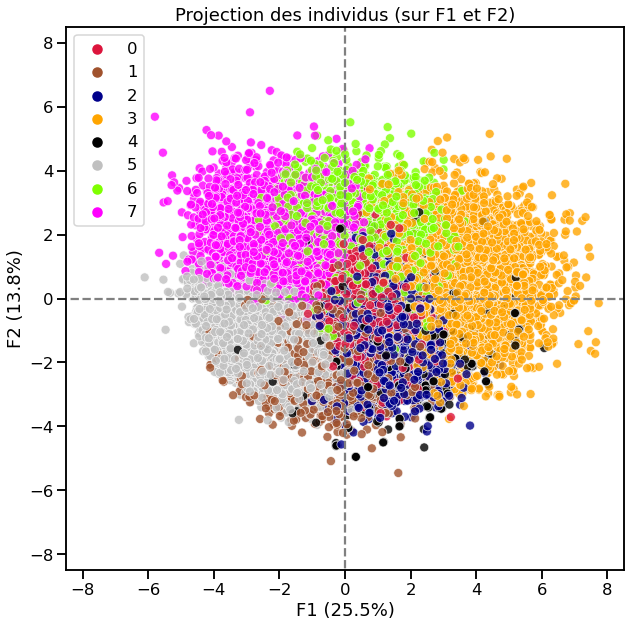

<Figure size 504x432 with 0 Axes>

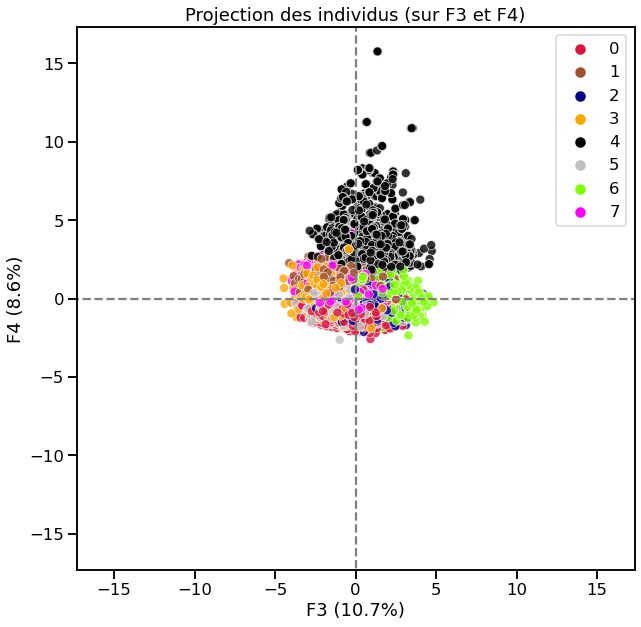

<Figure size 504x432 with 0 Axes>

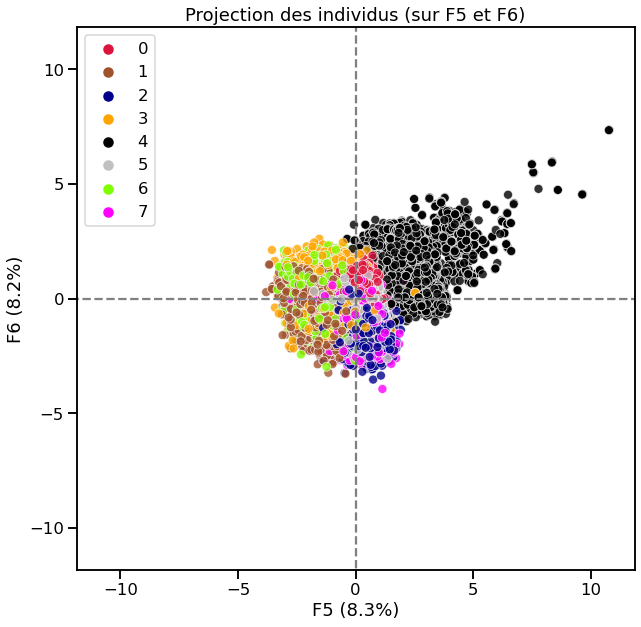

In [ ]:
display_factorial_planes_sns(X_projected, n_comp, pipeline_pca[1], [(0,1),(2,3),(4,5)], illustrative_var=pred, title='Projection_indiv', alpha=0.8, cmap=cmap)

In [ ]:
# Attribution des groupes

customer['group'] = pred

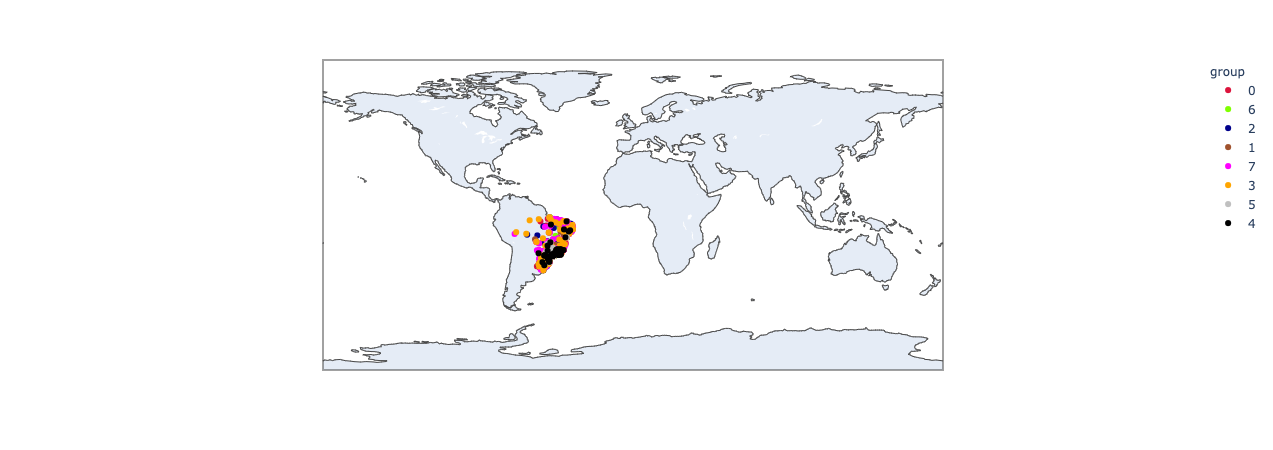

In [ ]:
# Origine géographique des clients en fonction du groupe

sample = customer.sample(1500, random_state= 42)

sample['group'] = sample['group'].astype('str')  # Modification du type de variable en discrète

fig = px.scatter_geo(sample,
                     lat=sample.lat,
                     lon=sample.long,
                     color=sample.group,
                    color_discrete_map=cmap_object)
fig.show()

In [ ]:
# Visualisation des groupes à l'aide du T-SNE

tsne = manifold.TSNE(random_state=42)
tsne_pipe = pipeline.make_pipeline(preprocessor, tsne)
X_tsne = tsne_pipe.fit_transform(X)

x = X_tsne[:,0]
y = X_tsne[:,1]

fig, ax = plt.subplots(figsize=(10,10))

ax = sns.scatterplot(x=x,y=y, hue=pred, palette = cmap)

plt.show()

CPU times: user 52min 2s, sys: 4min 13s, total: 56min 15s
Wall time: 9min 14s


In [ ]:
customer_dum.columns

Index(['basket_avg', 'last_purchase', 'avg_review_score', 'total_amount',
       'avg_vol_pack', 'avg_delivery_time', 'avg_freight_value', 'avg_weight',
       'payment_installments', 'lat', 'long', 'frequency', 'group',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher', 'same_state_False',
       'same_state_True', 'cat_appliance', 'cat_art', 'cat_audio_music',
       'cat_auto', 'cat_beauty_health', 'cat_book', 'cat_business',
       'cat_children', 'cat_construction', 'cat_fashion', 'cat_food',
       'cat_garden', 'cat_gift', 'cat_home', 'cat_misc', 'cat_office',
       'cat_party', 'cat_pet', 'cat_security', 'cat_sport', 'cat_technology',
       'cat_travel'],
      dtype='object')

In [ ]:
# Analyse des groupes 

pd.pandas.set_option('display.max_columns', None)

customer_dum = pd.get_dummies(customer)

customer_dum.groupby('group').agg({
    'basket_avg' : 'mean',
    'last_purchase': 'mean',
    'avg_review_score': 'mean',
    'total_amount': 'mean',
    'avg_vol_pack': 'mean',
    'avg_delivery_time': 'mean',
    'avg_freight_value': 'mean',
    'avg_weight': 'mean',
    'payment_installments': lambda x:x.value_counts().index[0],
    'lat': 'mean',
    'long': 'mean',
    'frequency': 'mean',
    'payment_type_boleto': lambda x :x.value_counts().index[0],
    'payment_type_credit_card': lambda x :x.value_counts().index[0],
    'payment_type_debit_card': lambda x :x.value_counts().index[0],
    'payment_type_voucher': lambda x :x.value_counts().index[0],
    'same_state_False': lambda x :x.value_counts().index[0],
    'same_state_True': lambda x :x.value_counts().index[0],
    'cat_appliance' : lambda x :x.value_counts().index[0],
    'cat_art' : lambda x :x.value_counts().index[0],
    'cat_audio_music' : lambda x :x.value_counts().index[0],
    'cat_auto' : lambda x :x.value_counts().index[0],
    'cat_beauty_health' : lambda x :x.value_counts().index[0],
    'cat_book' : lambda x :x.value_counts().index[0],
    'cat_business' : lambda x :x.value_counts().index[0],
    'cat_children' : lambda x :x.value_counts().index[0],
    'cat_construction' : lambda x :x.value_counts().index[0],
    'cat_fashion' : lambda x :x.value_counts().index[0],
    'cat_food' : lambda x :x.value_counts().index[0],
    'cat_garden' : lambda x :x.value_counts().index[0],
    'cat_gift' : lambda x :x.value_counts().index[0],
    'cat_home' : lambda x :x.value_counts().index[0],
    'cat_misc' : lambda x :x.value_counts().index[0],
    'cat_office' : lambda x :x.value_counts().index[0],
    'cat_party' : lambda x :x.value_counts().index[0],
    'cat_pet' : lambda x :x.value_counts().index[0],
    'cat_security' : lambda x :x.value_counts().index[0],
    'cat_sport' : lambda x :x.value_counts().index[0],
    'cat_technology' : lambda x :x.value_counts().index[0],
    'cat_travel' : lambda x :x.value_counts().index[0],    
})

,basket_avg,last_purchase,avg_review_score,total_amount,avg_vol_pack,avg_delivery_time,avg_freight_value,avg_weight,payment_installments,lat,long,frequency,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,same_state_False,same_state_True,cat_appliance,cat_art,cat_audio_music,cat_auto,cat_beauty_health,cat_book,cat_business,cat_children,cat_construction,cat_fashion,cat_food,cat_garden,cat_gift,cat_home,cat_misc,cat_office,cat_party,cat_pet,cat_security,cat_sport,cat_technology,cat_travel
group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,22932.901069,292.895995,4.554160,22932.901069,17138.132150,12.034134,18.100808,2084.252266,1.0,-21.904883,-46.392092,1.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15874.470694,38.517116,4.549110,15874.470694,8988.802488,6.980058,18.422470,1057.622661,1.0,-21.778705,-46.338572,1.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,37414.871632,284.583715,4.540212,37414.871632,11144.992139,11.153477,18.205779,1366.572769,10.0,-21.435099,-46.148548,1.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60399.853106,234.186609,4.161934,60764.894747,57945.880097,14.461721,47.604324,9805.582339,1.0,-20.293059,-45.912291,1.001048,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21736.655652,216.162839,4.172317,47101.677253,14641.323044,11.650828,18.979401,1966.259874,1.0,-21.618458,-46.281499,2.158934,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6344.372276,232.689436,4.478202,6344.418504,5321.357271,5.125258,9.625395,505.210218,1.0,-23.099203,-46.764583,1.000074,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,22221.474701,242.977575,1.139903,22221.474701,12137.486859,21.790512,19.047088,1533.214537,1.0,-20.612303,-45.528922,1.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2830.806054,274.218256,4.403338,2830.867956,5255.362159,14.987090,18.965344,534.922941,1.0,-19.029212,-45.924284,1.000248,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Analyse des groupes 

def RadarPlot(data=None, group=None, nb_features=None) :
    
    ### Créer un diagramme de Kiviat en fonction des principales variables ###
    
    prep = preprocessing.MinMaxScaler(feature_range=(1,5))
    customer_dum = pd.get_dummies(customer)

    radar_df = customer_dum.groupby('group').agg({
    'basket_avg' : 'mean',
    'last_purchase': 'mean',
    'avg_review_score': 'mean',
    'total_amount': 'mean',
    'avg_vol_pack': 'mean',
    'avg_delivery_time': 'mean',
    'avg_freight_value': 'mean',
    'avg_weight': 'mean',
    'payment_installments': lambda x:x.value_counts().index[0],
    'lat': 'mean',
    'long': 'mean',
    'frequency': 'mean',
    'same_state_True': lambda x :x.value_counts().index[0]    
    })
    
    radar_df = radar_df.drop(['lat', 'long'], axis=1)  
    radar_scaler = pipeline.make_pipeline(abso, log, prep)
    temp = radar_scaler.fit_transform(radar_df)
    temp = pd.DataFrame(index=radar_df.index, columns=radar_df.columns, data=temp)
    temp = temp.T
    temp = temp.iloc[:nb_features]
    fig = px.line_polar(temp, r=group,  theta=temp.index, line_close=True)
    fig.update_layout(polar = dict(
        radialaxis = dict(showticklabels=False, ticks='')),
                      title = 'Radarplot of group {}'.format(group),
                      title_x=0.5
    )
    fig.show()

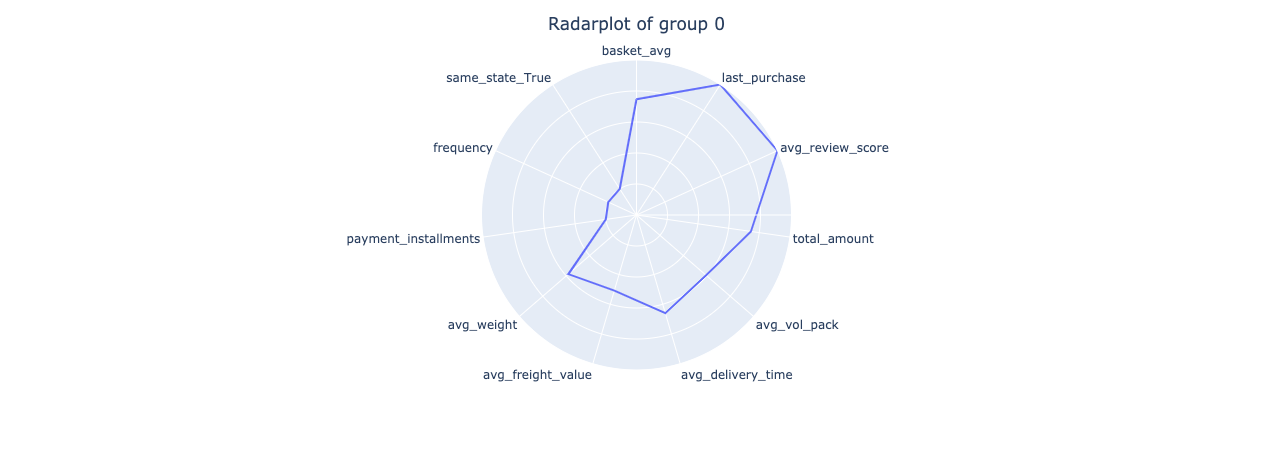

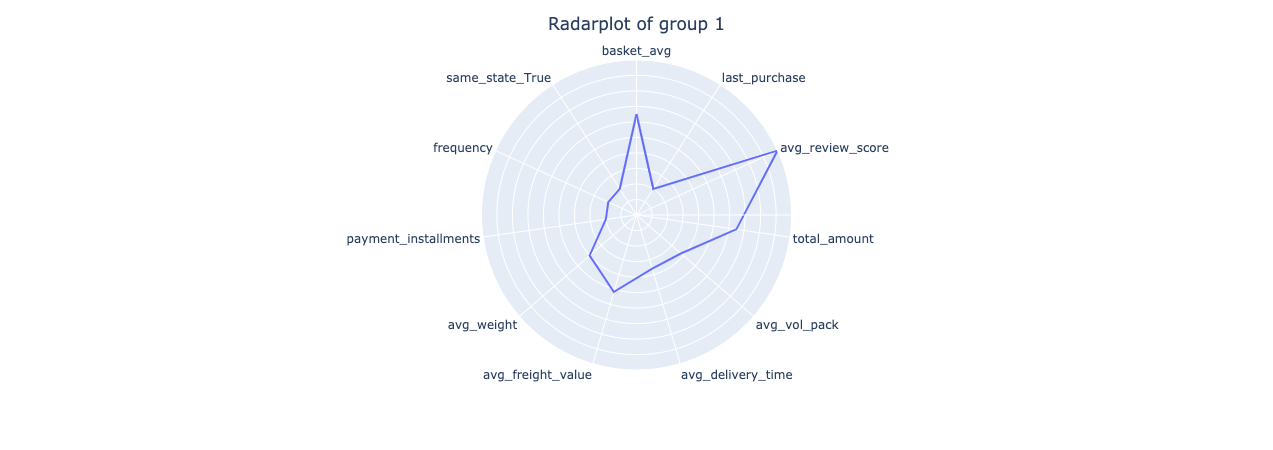

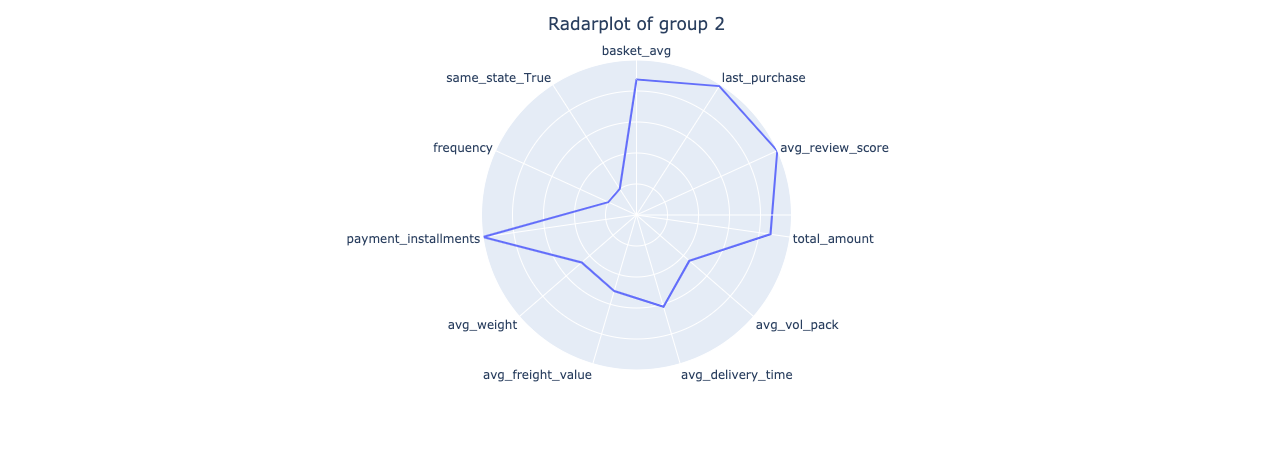

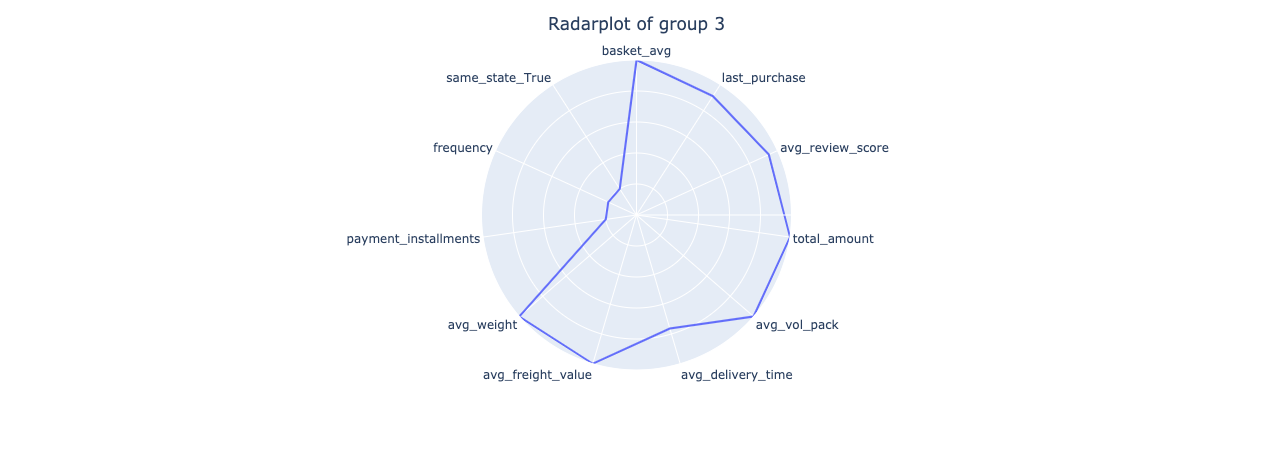

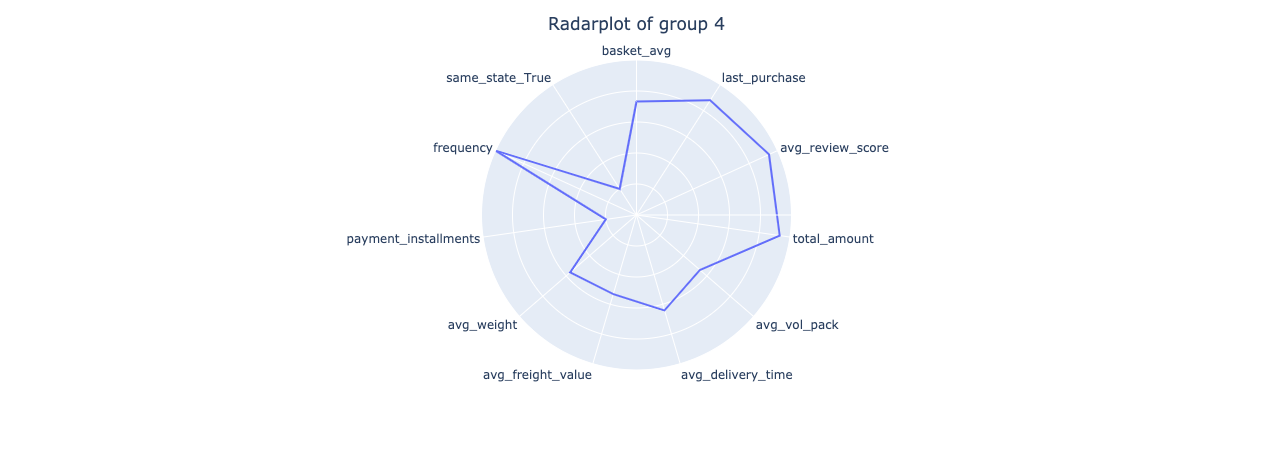

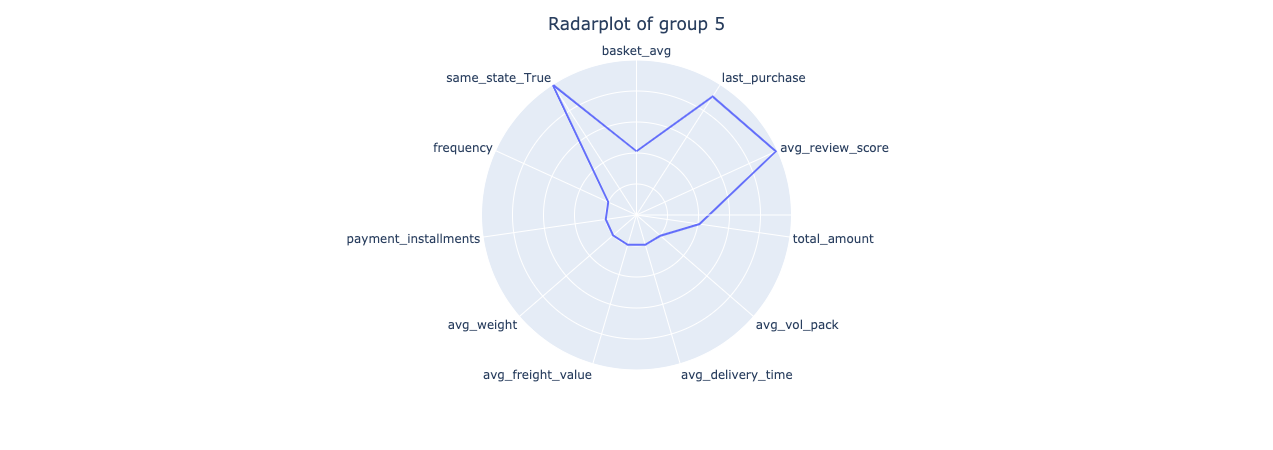

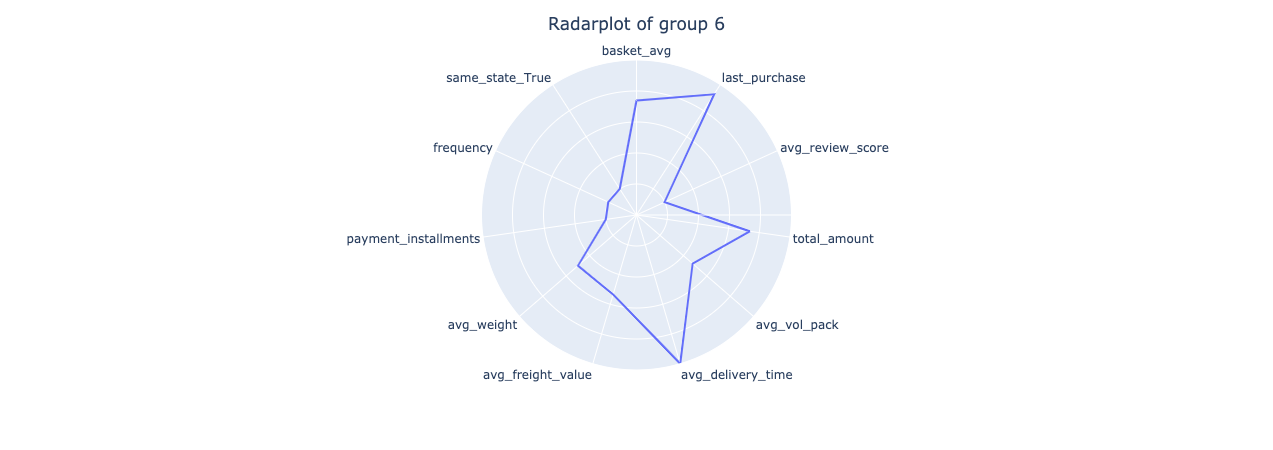

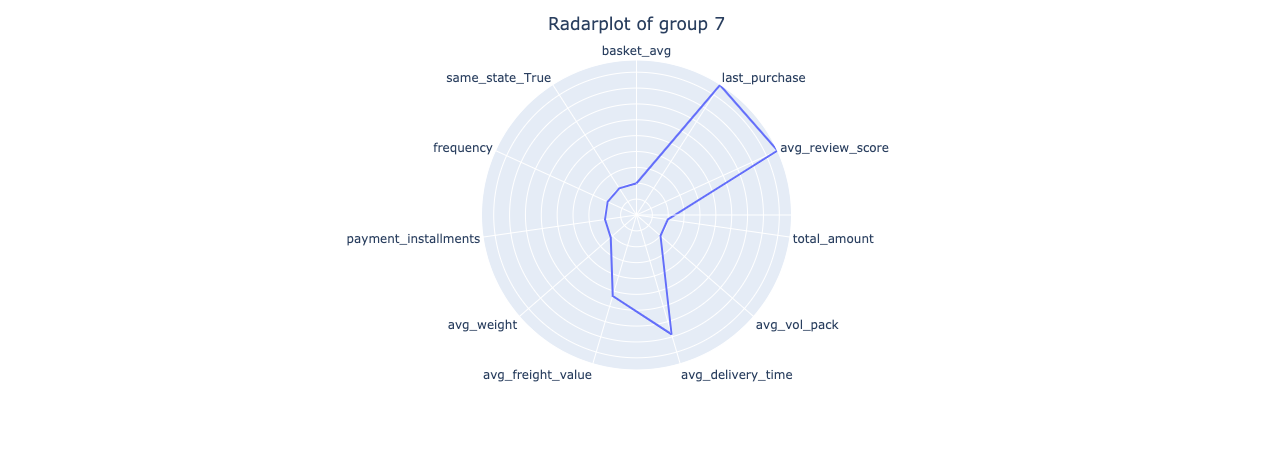

In [ ]:
for n in range(0,8) :
    RadarPlot(data=customer, group=n, nb_features=11)

In [ ]:
customer.groupby('group').count().iloc[:,0]

group
0    18076
1     9377
2    13976
3     9544
4     4354
5    13556
6     8874
7    16137
Name: basket_avg, dtype: int64

In [ ]:
customer.groupby('group').std()

,basket_avg,last_purchase,avg_review_score,total_amount,avg_vol_pack,avg_delivery_time,avg_freight_value,avg_weight,payment_installments,lat,long,frequency
group,,,,,,,,,,,,
0,37517.295313,136.945974,0.697614,37517.295313,15514.959424,6.927716,6.314728,2382.383618,0.609996,4.806853,3.771932,0.000000
1,23049.330980,24.253113,0.821508,23049.330980,9813.277433,3.746091,8.323583,1491.639343,2.097116,4.757608,3.633477,0.000000
2,65660.993441,143.951993,0.754848,65660.993441,11222.030966,6.924338,6.856376,1652.859908,2.631458,5.232418,3.984883,0.000000
3,135902.186654,149.493330,1.217557,144304.347727,42866.504810,10.327660,32.134572,6275.871364,3.357639,6.544780,4.699426,0.032354
4,35199.432688,142.106564,1.087931,80873.773884,16562.215808,7.074626,9.898542,2768.098396,2.667687,5.061749,3.865543,0.639107
5,7652.406227,140.350805,0.922157,7652.373577,6689.511087,3.201384,2.734058,699.529311,1.303907,1.879861,1.637389,0.008589
6,55756.999190,136.763228,0.367838,55756.999190,14392.679821,16.021137,8.883846,2271.871150,2.692946,6.169250,4.328558,0.000000
7,2598.020892,143.732615,0.877568,2597.965946,6956.778693,8.618463,8.001758,871.814623,1.651547,7.440529,5.308400,0.015743


#### Stabilité

In [ ]:
# Import des données, application des modications afin d'effectuer des tests sur des sous-parties du dataset

cdir = 'P5/'
files = os.listdir('P5')

# Import

customers = pd.read_csv(cdir + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(cdir + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(cdir + 'olist_order_items_dataset.csv')
order_payements = pd.read_csv(cdir + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(cdir + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(cdir + 'olist_orders_dataset.csv')
products = pd.read_csv(cdir + 'olist_products_dataset.csv')
sellers = pd.read_csv(cdir + 'olist_sellers_dataset.csv')
cat_name = pd.read_csv(cdir + 'product_category_name_translation.csv')

# Merge

temp1 = pd.merge(customers, orders, on='customer_id')
temp2 = pd.merge(temp1, order_items, on='order_id')
temp3 = pd.merge(temp2, order_payements, on='order_id')
temp4 = pd.merge(temp3, order_reviews, on='order_id')
temp5 = pd.merge(temp4, products, on='product_id')
temp6 = pd.merge(temp5, sellers, on='seller_id')
temp7 = pd.merge(temp6, cat_name, on='product_category_name')
df = pd.merge(temp7, geolocation, left_on='customer_zip_code_prefix', 
              right_on='geolocation_zip_code_prefix')

# Création de variables

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['delivery_time'] = df['delivery_time'].dt.days
df['same_state'] = df['geolocation_state'] == df['seller_state']
df['volume'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

# Sélection

sel = df[['customer_unique_id', 'customer_city', 'customer_state', 'order_id',
          'order_purchase_timestamp', 'order_status','product_id', 'seller_id', 'price',
          'freight_value', 'review_score', 'product_category_name_english',
          'geolocation_lat', 'geolocation_lng',  'payment_type', 'payment_installments',
          'volume', 'product_weight_g', 'delivery_time', 'same_state']]

def CategoryReplacerSeries(to_replace=None, value=None, data=None):
    ### Mapping des nouvelles catégories ###
    for x in to_replace :
        data.replace(x, value, inplace=True)   
        

# Définition des nouvelles catégories
        
technology = ['telephony', 'computers_accessories', 'electronics', 'computers', 'consoles_games',
                'fixed_telephony', 'dvds_blu_ray', 'tablets_printing_image', 'cine_photo']
audio_music = ['audio', 'music', 'musical_instruments', 'cds_dvds_musicals']
food = ['food', 'drinks', 'food_drink', 'la_cuisine']
fashion = ['fashion_childrens_clothes', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_male_clothing',
           'fashion_sport', 'fashio_female_clothing', 'fashion_underwear_beach']
office = ['office_furniture', 'stationery', 'furniture_decor']
home = ['housewares', 'bed_bath_table', 'furniture_living_room', 
        'kitchen_dining_laundry_garden_furniture', 'home_confort', 'furniture_bedroom', 'furniture_mattress_and_upholstery',
       'home_comfort_2']
auto = ['auto']
sport = ['sports_leisure']
children = ['baby', 'toys', 'fashion_childrens_clothes']
misc = ['cool_stuff', 'market_place']
garden = ['garden_tools', 'flowers', 'costruction_tools_garden']
construction = ['construction_tools_construction', 'home_construction', 'construction_tools_safety',
               'costruction_tools_tools', 'construction_tools_lights']
beauty_health = ['health_beauty', 'perfumery', 'diapers_and_hygiene']
gift = ['watches_gifts']
book = ['books_general_interest', 'books_technical', 'books_imported']
pet = ['pet_shop']
appliance = ['home_appliances', 'home_appliances_2', 'air_conditioning', 'small_appliances_home_oven_and_coffee',
            'small_appliances']
business = ['industry_commerce_and_business', 'agro_industry_and_commerce']
art = ['art', 'arts_and_craftmanship']
travel = ['luggage_accessories']
party = ['christmas_supplies', 'party_supplies']
security = ['security_and_services', 'signaling_and_security']

sel.loc[:,'cat'] = sel['product_category_name_english']

list_vars = [technology, audio_music, food, fashion, office, home, auto, sport, children, misc, garden, construction,
             beauty_health, gift, book, pet, appliance, business, art, travel, party, security]
list_names = ['technology', 'audio_music', 'food', 'fashion', 'office', 'home', 'auto', 'sport', 'children', 'misc',
              'garden', 'construction', 'beauty_health', 'gift', 'book', 'pet', 'appliance', 'business', 'art',
              'travel', 'party', 'security']

# Modifications diverses du jeux de données 

def TransformDF(sel=None):
    ### Transformation du jeux de données. ###
    sum_order_by_cust = sel.groupby(['customer_unique_id', 'order_id'])['price'].sum()
    basket_avg = sum_order_by_cust.groupby(['customer_unique_id']).mean()
    
    sel.loc[:,'order_purchase_timestamp'] = pd.to_datetime(sel['order_purchase_timestamp'])
    
    most_recent = sel.groupby('customer_unique_id')['order_purchase_timestamp'].max()
    
    total_amount = sel.groupby('customer_unique_id')['price'].sum()
    
    frequency = sel.groupby('customer_unique_id')['order_id'].nunique()
    
    review_avg = sel.groupby('customer_unique_id')['review_score'].mean()
    
    temp = sel.set_index('customer_unique_id')
    
    cat = sel.loc[:,'cat']
    
    for y in range(len(list_vars)):
        CategoryReplacerSeries(to_replace=list_vars[y], value=list_names[y], data=cat)
        
    sel.loc[:,'cat'] = cat
    
    temp = sel.drop_duplicates(['product_id']).set_index('customer_unique_id')
    
    volume = sel.groupby('customer_unique_id')['volume'].mean()
    
    weight = sel.groupby('customer_unique_id')['product_weight_g'].mean()
    
    payment_inst = sel.groupby('customer_unique_id')['payment_installments'].mean()
    
    payment = sel.groupby('customer_unique_id')['payment_type'].agg(lambda x:x.value_counts().index[0])
    
    delivery = sel.groupby('customer_unique_id')['delivery_time'].mean()
    
    freight = sel.groupby('customer_unique_id')['freight_value'].mean()
    
    distance = sel.groupby('customer_unique_id')['same_state'].agg(lambda x:x.value_counts().index[0])
    
    lat = sel.groupby('customer_unique_id')['geolocation_lat'].agg(lambda x:x.value_counts().index[0])
    
    long = sel.groupby('customer_unique_id')['geolocation_lng'].agg(lambda x:x.value_counts().index[0])

    temp1 = pd.merge(basket_avg, most_recent, left_on=basket_avg.index,
        right_on=most_recent.index)
    temp2 = pd.merge(temp1, review_avg, left_on='key_0',
        right_on=review_avg.index)
    temp3 = pd.merge(temp2, total_amount, left_on='key_0',
        right_on=total_amount.index)
    temp4 = pd.merge(temp3, volume, left_on='key_0',
        right_on=volume.index)
    temp5 = pd.merge(temp4, payment, left_on='key_0',
        right_on=payment.index)
    temp6 = pd.merge(temp5, delivery, left_on='key_0',
        right_on=payment.index)
    temp7 = pd.merge(temp6, distance, left_on='key_0',
        right_on=distance.index)
    temp8 = pd.merge(temp7, freight, left_on='key_0',
        right_on=freight.index)
    temp9 = pd.merge(temp8, weight, left_on='key_0',
        right_on=weight.index)
    temp10 = pd.merge(temp9, payment_inst, left_on='key_0',
        right_on=payment_inst.index)
    temp11 = pd.merge(temp10, lat, left_on='key_0',
        right_on=lat.index)
    temp12 = pd.merge(temp11, long, left_on='key_0',
        right_on=long.index)
    temp13 = pd.merge(temp12, frequency, left_on='key_0',
        right_on=long.index)
    temp13.columns = ['customer_unique_id', 'basket_avg', 'last_purchase', 'avg_review_score',
                      'total_amount','avg_vol_pack', 'payment_type', 'avg_delivery_time',
                      'same_state', 'avg_freight_value', 'avg_weight', 'payment_installments',
                      'lat', 'long', 'frequency']
    customer = pd.merge(temp13, sel[['customer_unique_id', 'cat']], left_on='customer_unique_id',
        right_on='customer_unique_id')
    customer = customer.set_index('customer_unique_id')
    days = customer.last_purchase.max() - customer.last_purchase
    days = days.dt.days

    customer['last_purchase'] = days
    customer = customer.drop_duplicates()
    customer = customer.dropna()
    customer['same_state'] = customer['same_state'].astype('category')
    return customer

In [ ]:
# Vérification

customer_test = TransformDF(sel=sel)

/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CPU times: user 2min 1s, sys: 11.9 s, total: 2min 13s
Wall time: 2min 14s


In [ ]:
# Vérification

from pandas.testing import assert_frame_equal
assert_frame_equal(customer.iloc[:,:-1], customer_test)

AssertionError: DataFrame.iloc[:, 5] (column name="payment_type") are different

DataFrame.iloc[:, 5] (column name="payment_type") values are different (1.30786 %)
[index]: [0000366f3b9a7992bf8c76cfdf3221e2, 0000b849f77a49e4a4ce2b2a4ca5be3f, 0000f46a3911fa3c0805444483337064, 0000f6ccb0745a6a4b88665a16c9f078, 0004aac84e0df4da2b147fca70cf8255, 0004bd2a26a76fe21f786e4fbd80607f, 00050ab1314c0e55a6ca13cf7181fecf, 00053a61a98854899e70ed204dd4bafe, 0005e1862207bf6ccc02e4228effd9a0, 0005ef4cd20d2893f0d9fbd94d3c0d97, 0006fdc98a402fceb4eb0ee528f6a8d4, 00082cbe03e478190aadbea78542e933, 00090324bbad0e9342388303bb71ba0a, 000949456b182f53c18b68d6babc79c1, 000a5ad9c4601d2bbdd9ed765d5213b3, 000bfa1d2f1a41876493be685390d6d3, 000c8bdb58a29e7115cfc257230fb21b, 000d460961d6dbfa3ec6c9f5805769e1, 000de6019bb59f34c099a907c151d855, 000e309254ab1fc5ba99dd469d36bdb4, 000ec5bff359e1c0ad76a81a45cb598f, 000ed48ceeb6f4bf8ad021a10a3c7b43, 000fbf0473c10fc1ab6f8d2d286ce20c, 000fbf0473c10fc1ab6f8d2d286ce20c, 0010a452c6d13139e50b57f19f52e04e, 0010fb34b966d44409382af9e8fd5b77, 001147e649a7b1afd577e873841632dd, 00115fc7123b5310cf6d3a3aa932699e, 0011805441c0d1b68b48002f1d005526, 0011857aff0e5871ce5eb429f21cdaf5, 0011c98589159d6149979563c504cb21, 0012929d977a8d7280bb277c1e5f589d, 0014a5a58da615f7b01a4f5e194bf5ea, 0015752e079902b12cd00b9b7596276b, 00172711b30d52eea8b313a7f2cced02, 00191a9719ef48ebb5860b130347bf33, 001926cef41060fae572e2e7b30bd2a4, 001928b561575b2821c92254a2327d06, 00196c4c9a3af7dd2ad10eade69c926f, 00196fdb2bf9edfc35e88ebfbcf8d781, 0019da6aa6bcb27cc32f1249bd12da05, 0019e8c501c85848ac0966d45226fa1d, 001a2bf0e46c684031af91fb2bce149d, 001a34eb30ecb8e3aacb07c475ca4dd1, 001a3a8e11d76c9a366c31a4aa2cc529, 001ae5a1788703d64536c30362503e49, 001deb796b28a3a128d6113857569aa4, 001f3c4211216384d5fe59b041ce1461, 002043098f10ba39a4600b6c52fbfe3c, 002311514717ca8b65b09a26cdf7b91a, 0023557a94bef0038066b5d1b3dc763e, 002471155ecd08d208d1376720e2a907, 00256bf7b05c08f6a5849df3d0a64f1f, 0025795df7a7d077c4c90162fa820085, 0027324a96d26a2bc7d69262f83c8403, 0028a7d8db7b0247652509358ad8d755, 0028cfeb9dfcd3628a56d5b6400deef5, 00293787e2aec37a9c253b63fdfe2049, 002aba8c1af80acacef6e011f9f23262, 002ae492472e45ad6ebeb7a625409392, 002b4cd83fabaffaa475f78ea5ef3e08, 002bdeb33da5b1b3ce8b9c822f749c82, 002cdf87d4c03f08f7eb4551a923affc, 002d3bd901608f67c3fc11eaaa842b13, 002d71b244beb91ca7030b15ab526446, 002da6dde369f6a8b4c999ed61eb5a87, 002eb8b96288f3804e21d2777ac29895, 002ed12115742033f015cb3c269ccf68, 002ef00822613c94613e60e03b169fef, 002feefec5af0a3b26ee7839c66d205e, 003035f5ec76f2220098377482de93c9, 003162bf0351f47a1a247992b8b9b42d, 00324c9f4d710e7bac5c5ba679714430, 0032c76b20340da25249092a268ce66c, 0032ca69771a7758ce643258bb9e4ac7, 0033f4a2887e07e25aa1204d482f41ba, 00344274804f3b8003de1b0562ae01df, 0034c76b7e6a17d738375b99afc2f01e, 0035029989e6fc5cf030918a5f9f2037, 003650b504826ea534e02eba0ab58dd5, 0036a074f98b80c4f1fc33dbbcf9c552, 0036b4a3d09ad551a5188c2e374da402, 0036d365b138cc0ee06bed755bcb5044, 00370dfde3d012c420d29657afc2fc8b, 00377a18050b898b93e2c774be9947db, 0037aa56b017c105c3a9d47af71fff98, 0037d2bbb9ebc39d9114aea27ee16d72, 0037eb1ff742ee2e71ba887f65f3c6f3, 003800162424b7b5b3d75c9cf22a66e7, 00391594070baf8603f5fdc1d0c6a48c, 003a5571a07dcf09bf117d13d2980ba3, 003a7a8eb096ed3cbf713d2def1ca701, 003ac9408252444b489b1bfc013f5f8c, 003ae409f37c3c30cb1c974af3a42692, 003c2067070f5b3d923235b1ea1cc17b, 003c457932a554e4df13834237b1ed00, 003d56767e53e08671de00da3fba8d40, 003db7adfcdc49857b095a50191b6c9d, 003e28cb6fab8a0901bff9229612375f, 003e2af81ea3c72fbdd093f07724a4de, ...]
[left]:  [credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, voucher, boleto, credit_card, boleto, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, voucher, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, boleto, credit_card, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, boleto, boleto, boleto, credit_card, credit_card, credit_card, credit_card, ...]
[right]: [credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, voucher, boleto, credit_card, boleto, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, voucher, boleto, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, boleto, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, boleto, credit_card, credit_card, credit_card, boleto, credit_card, credit_card, credit_card, credit_card, boleto, credit_card, boleto, boleto, boleto, credit_card, credit_card, credit_card, credit_card, ...]

In [ ]:
# Comparaison de l'ARI à J+1

mask2017 = sel.order_purchase_timestamp < pd.to_datetime(datetime.date(year = 2018, month = 1, day = 1))
sel2017 = sel[mask2017]

mask2017_plus = sel.order_purchase_timestamp < pd.to_datetime(datetime.date(year = 2018, month = 1, day = 2))
sel2017_plus = sel[mask2017_plus]


customer_2017 = TransformDF(sel=sel2017)
customer_2017_plus_1 = TransformDF(sel=sel2017_plus)

/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

CPU times: user 1min 50s, sys: 6.58 s, total: 1min 57s
Wall time: 1min 59s


In [ ]:
def kmeans_pipe(data=None, n_clusters=n_clusters):
    
    ### Attribution des labels ###
    
    kmeans = cluster.KMeans(n_clusters = n_clusters, random_state=42)
    k_pipe = pipeline.make_pipeline(preprocessor, kmeans).fit(data)
    pred = k_pipe.predict(data)
    return pred

In [ ]:
# Comparaison de l'ARI à J+1

pred_2017 = kmeans_pipe(data=customer_2017, n_clusters=8)
pred_2017_plus_1 = kmeans_pipe(data=customer_2017_plus_1, n_clusters=8)

customer_2017['pred_2017'] = pred_2017
customer_2017_plus_1['pred_2017_plus_1'] = pred_2017_plus_1

test = pd.merge(customer_2017['pred_2017'], customer_2017_plus_1['pred_2017_plus_1'], left_index=True, right_index=True)

metrics.adjusted_rand_score(test['pred_2017'], test['pred_2017_plus_1'] )

0.9903876758164643

In [ ]:
# Comparaison de l'ARI à 6 mois

mask2017_6m = sel.order_purchase_timestamp < pd.to_datetime(datetime.date(year = 2018, month = 3, day = 1))
sel2017_6m = sel[mask2017_6m]
customer_6m= TransformDF(sel=sel2017_6m)
pred_6m = kmeans_pipe(data=customer_6m, n_clusters=8)
customer_6m['pred_6m'] = pred_6m
test = pd.merge(customer_2017['pred_2017'], customer_6m['pred_6m'], left_index=True, right_index=True)
metrics.adjusted_rand_score(test['pred_2017'], test['pred_6m'] )

/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.7725990443031933

In [ ]:
def ComputeAri(year=None, month=None, day=None, df_to_comp=customer_2017, col ='pred_2017'):
    
    ### Calcul le score ARI entre deux jeux de données ###
    
    mask = sel.order_purchase_timestamp < pd.to_datetime(datetime.date(year = year, month = month, day = day))
    temp_sel= sel[mask]
    temp_customer= TransformDF(sel=temp_sel)
    pred_temp = kmeans_pipe(data=temp_customer, n_clusters=8)
    temp_customer['pred_temp'] = pred_temp
    test = pd.merge(df_to_comp[col], temp_customer['pred_temp'], left_index=True, right_index=True)
    score = metrics.adjusted_rand_score(test[col], test['pred_temp'] )
    return score

/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

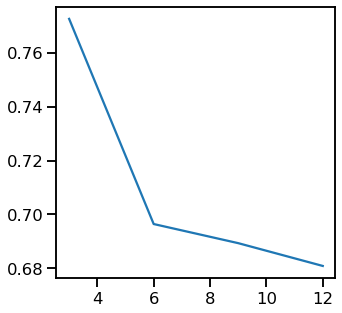

In [ ]:
# Evolution du score ARI sur 1 an

ari_list = []

for n in [3,6,9,12] :
    ari = ComputeAri(year=2018, month=n, day=1, df_to_comp=customer_2017, col ='pred_2017')
    ari_list.append(ari)
    


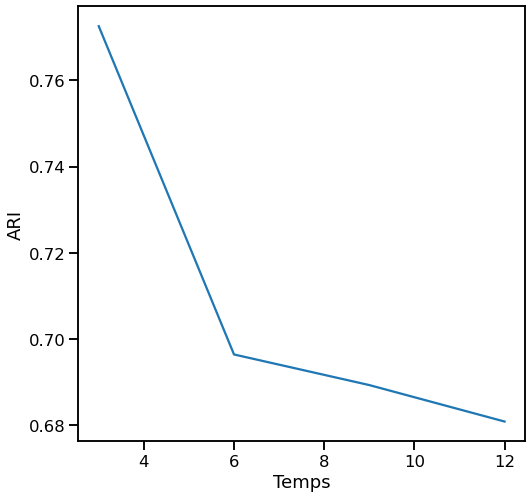

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot([3,6,9,12], ari_list)
ax.set_xlabel('Temps')
ax.set_ylabel('ARI')
plt.show()

In [ ]:
ari_list

[0.7725990443031933,
 0.6964217083809665,
 0.6893194878588863,
 0.6808577981417101]

## DBScan

In [ ]:
# OPTICS avec des paramètres standards

db = cluster.OPTICS(min_samples=50, xi=.1, min_cluster_size=.1)

pipeline_db = pipeline.make_pipeline(preprocessor_sparse, db)

pred_db = pipeline_db.fit_predict(X)

display_factorial_planes_sns(X_projected, n_comp, pipeline_pca[1], [(0,1),(2,3),(4,5)], illustrative_var=pred_db, cmap=None, title='Projection_indiv')